In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
import glob

def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*'))

In [3]:
train_url = '/Users/shlee/Desktop/emotion/train'
test_url = '/Users/shlee/Desktop/emotion/test'

In [4]:
listdir_nohidden(train_url)

['/Users/shlee/Desktop/emotion/train/happy',
 '/Users/shlee/Desktop/emotion/train/sad',
 '/Users/shlee/Desktop/emotion/train/fearful',
 '/Users/shlee/Desktop/emotion/train/neutral',
 '/Users/shlee/Desktop/emotion/train/angry',
 '/Users/shlee/Desktop/emotion/train/disgusted',
 '/Users/shlee/Desktop/emotion/train/surprised']

In [5]:
target_var = os.listdir(train_url)

In [6]:
x_train = np.array([ len(train_url+'/'+i) for i in target_var ])
x_test = np.array([ len(test_url+'/'+i) for i in target_var ])

In [7]:
# 이미지데이터 생성
# 255로 나눠주어서 정규화 진행 및 val_set으로 사용할 20% 분리

train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.2) 
test_idg = ImageDataGenerator(rescale=1./255)

# 배치사이즈 및 이미지사이즈 등 설정
img_size = (48, 48)
batch_size = 64

train_img = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
test_img = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_url, subset='training', **train_img)
valid = train_idg.flow_from_directory(directory=train_url, subset='validation', **train_img)
test  = test_idg.flow_from_directory(directory=test_url, **test_img)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


2022-07-26 22:51:44.216548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-26 22:51:44.216940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )        

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=50)

Epoch 1/50


2022-07-26 22:52:50.008891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


359/359 [==============================] - ETA: 0s - loss: 1.6927 - accuracy: 0.3434

2022-07-26 22:53:14.901753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


359/359 [==============================] - 27s 73ms/step - loss: 1.6927 - accuracy: 0.3434 - val_loss: 1.5183 - val_accuracy: 0.4045
Epoch 2/50
359/359 [==============================] - 26s 72ms/step - loss: 1.5066 - accuracy: 0.4176 - val_loss: 1.3737 - val_accuracy: 0.4787
Epoch 3/50
359/359 [==============================] - 26s 73ms/step - loss: 1.3937 - accuracy: 0.4663 - val_loss: 1.2935 - val_accuracy: 0.5071
Epoch 4/50
359/359 [==============================] - 26s 72ms/step - loss: 1.3099 - accuracy: 0.4984 - val_loss: 1.2479 - val_accuracy: 0.5295
Epoch 5/50
359/359 [==============================] - 26s 73ms/step - loss: 1.2418 - accuracy: 0.5312 - val_loss: 1.1900 - val_accuracy: 0.5503
Epoch 6/50
359/359 [==============================] - 26s 73ms/step - loss: 1.1883 - accuracy: 0.5503 - val_loss: 1.1726 - val_accuracy: 0.5478
Epoch 7/50
359/359 [==============================] - 27s 74ms/step - loss: 1.1358 - accuracy: 0.5736 - val_loss: 1.1452 - val_accuracy: 0.5668
Epo

KeyboardInterrupt: 

In [ ]:
pip install scipy

In [11]:
y_pred = model.predict(test)
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

  8/113 [=>............................] - ETA: 1s

2022-07-26 23:08:42.106635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 2s 17ms/step


In [12]:
y_actual = test.classes[test.index_array]

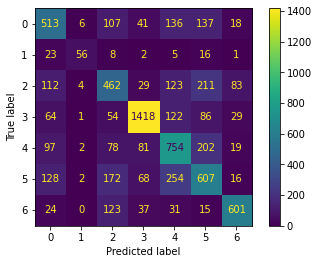

In [13]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
pip install sklearn

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.5338    0.5355    0.5347       958
           1     0.7887    0.5045    0.6154       111
           2     0.4602    0.4512    0.4556      1024
           3     0.8461    0.7993    0.8220      1774
           4     0.5291    0.6115    0.5673      1233
           5     0.4765    0.4868    0.4816      1247
           6     0.7836    0.7232    0.7522       831

    accuracy                         0.6145      7178
   macro avg     0.6311    0.5874    0.6041      7178
weighted avg     0.6226    0.6145    0.6172      7178



In [15]:
target_var

['happy',
 '.DS_Store',
 'sad',
 'fearful',
 'neutral',
 'angry',
 'disgusted',
 'surprised']

In [16]:
for i,em in enumerate(target_var):
    print(i,em)

0 happy
1 .DS_Store
2 sad
3 fearful
4 neutral
5 angry
6 disgusted
7 surprised
